## We are given a csv of Stack overflow that contains data of programing languages and their posts on stack overflow. We will do its analysis using pandas and matplotlib

In [2]:
import pandas as pd
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0) # Substituting our own column names "DATE", "TAG", and "POSTS"
df.shape # Checking shape of csv

(1991, 3)

In [11]:
# Peaking the head
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [12]:
# Peaking the tail
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [9]:
# Count the number of non-NaN values in each column.
print(df['DATE'].count())
print(df['TAG'].count())
print(df['POSTS'].count())

1991
1991
1991


In [24]:
# Checking which programming language had the most number of posts since the creation of Stack Overflow
languages = df['TAG'].unique()
language_counts = {}

for lan in languages:
    count = df[df['TAG'] == lan]['POSTS'].sum()
    language_counts[lan] = count
    print(f"{lan}: {count}")

# Find the language with the maximum posts
most_posts_language = max(language_counts, key=language_counts.get)
most_posts_count = language_counts[most_posts_language]

print(f"\nThe programming language with the most posts is '{most_posts_language}' with {most_posts_count} posts.")




c#: 1423530
assembly: 34852
javascript: 2056510
c: 336042
python: 1496210
perl: 65286
c++: 684210
java: 1696403
delphi: 46212
ruby: 214582
php: 1361988
r: 356799
swift: 273055
go: 47499

The programming language with the most posts is 'javascript' with 2056510 posts.


In [25]:
# Checking how many months of posts exist for each programming language
languages = df['TAG'].unique()
language_counts = {}

for lan in languages:
    count = df[df['TAG'] == lan].shape[0]
    language_counts[lan] = count
    print(f"{lan}: {count}")




c#: 145
assembly: 144
javascript: 144
c: 144
python: 144
perl: 144
c++: 144
java: 144
delphi: 144
ruby: 144
php: 144
r: 142
swift: 135
go: 129


In [ ]:
# Formaing the dates to more readble format
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [32]:
# Reshaping the csv data to better understand
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [33]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [34]:
# Updating the reshaped_df dataframe by replacig NaN with 0
reshaped_df.fillna(0, inplace=True) 
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [35]:
# Check if there are any NaN values left in the entire DataFrame
reshaped_df.isna().values.any()

np.False_

In [36]:
import matplotlib.pyplot as plt

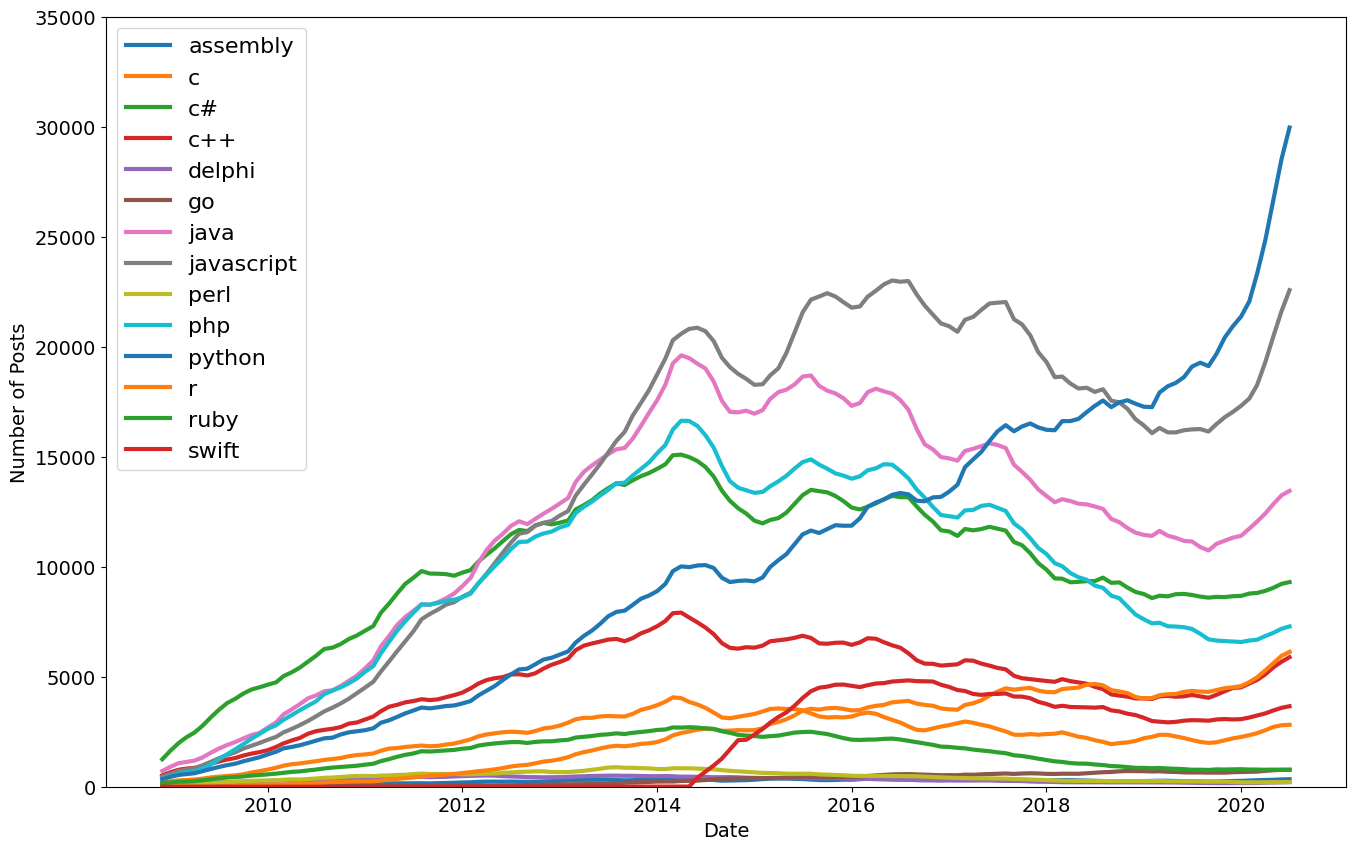

In [42]:
# Ploting graph for each language posts
roll_df = reshaped_df.rolling(window=6).mean() # The window is number of observations that are averaged

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)